# Blood Glucose Control - EDA

**Name:** *Srinithi Ravikumar*



### Import Data

There are multiple data sets each corresponding to a person with diabetes. Please load the files into a single data set while retaining the ability to distinguish between the PWD. 

In [81]:
import pandas as pd

# Loading datasets 
file_1 = "EDA\\gluroo_500030.csv"
file_2 = "EDA\\gluroo_679372.csv"

df1 = pd.read_csv(file_1)
df2 = pd.read_csv(file_2)

# Displaying the first 5 rows of each dataset
print("First 5 rows of df1:")
print(df1.head(20))
print("\n")

print("First 5 rows of df2:")
print(df2.head(20))

# Combining datasets
combined_df = pd.concat([df1, df2], ignore_index=True)

First 5 rows of df1:
                                date  sender_id    bgl  bgl_date_millis text  \
0   2024-05-01 00:00:27.029000-05:00        NaN  114.0              NaN  NaN   
1   2024-05-01 00:05:27.183000-05:00        NaN  117.0              NaN  NaN   
2   2024-05-01 00:10:26.949000-05:00        NaN  113.0              NaN  NaN   
3   2024-05-01 00:15:27.180000-05:00        NaN  112.0              NaN  NaN   
4   2024-05-01 00:20:27.021000-05:00        NaN  113.0              NaN  NaN   
5   2024-05-01 00:25:27.441000-05:00        NaN  119.0              NaN  NaN   
6   2024-05-01 00:30:27.608000-05:00        NaN  123.0              NaN  NaN   
7   2024-05-01 00:35:26.812000-05:00        NaN  129.0              NaN  NaN   
8   2024-05-01 00:40:26.669000-05:00        NaN  134.0              NaN  NaN   
9   2024-05-01 00:45:26.744000-05:00        NaN  129.0              NaN  NaN   
10  2024-05-01 00:50:27.355000-05:00        NaN  123.0              NaN  NaN   
11  2024-05-01 00:5

In [82]:

# Data Preprocessing

# Removing rows with missing values in key columns 
combined_df.dropna(subset=['bgl'], inplace=True)

# Checking if 'bgl_date_millis' exists and converting to datetime object
if 'bgl_date_millis' in combined_df.columns:
    combined_df['bgl_date'] = pd.to_datetime(combined_df['bgl_date_millis'], unit='ms', errors='coerce')
else:
    print("Column 'bgl_date_millis' not found in the DataFrame.")

# Filtering out outliers/incorrect or placeholder values
combined_df = combined_df[(combined_df['bgl'] > 0) & (combined_df['bgl'] != -1)]

# Keeping only relevant columns for analysis (e.g., blood glucose readings)
combined_df_cleaned = combined_df[['bgl_date', 'bgl', 'trend']].copy()  # Create a copy to avoid warnings

# Creating separate columns for date and time
combined_df_cleaned['date'] = combined_df_cleaned['bgl_date'].dt.date
combined_df_cleaned['time'] = combined_df_cleaned['bgl_date'].dt.time

print("First 5 rows of cleaned and preprocessed data:")
print(combined_df_cleaned.head())


First 5 rows of cleaned and preprocessed data:
  bgl_date    bgl trend date time
0      NaT  114.0  FLAT  NaT  NaT
1      NaT  117.0  FLAT  NaT  NaT
2      NaT  113.0  FLAT  NaT  NaT
3      NaT  112.0  FLAT  NaT  NaT
4      NaT  113.0  FLAT  NaT  NaT


### Two Data Visualizations

Create at least two visualizations that are of interest to you. They can be things that would be useful information for a PWD to know, or they could be useful for informing future modeling work. If you aren't sure what to visualize try recreating common diabetes data visualizations that you can find on the internet. 

## Real Time Blood Glucose Levels with Target Range Overlay

This data visualization shows the patients' blood glucose readings over time. We can easily see when the levels are too high or too low. The rolling average helps you see trends and how stable your blood glucose is.

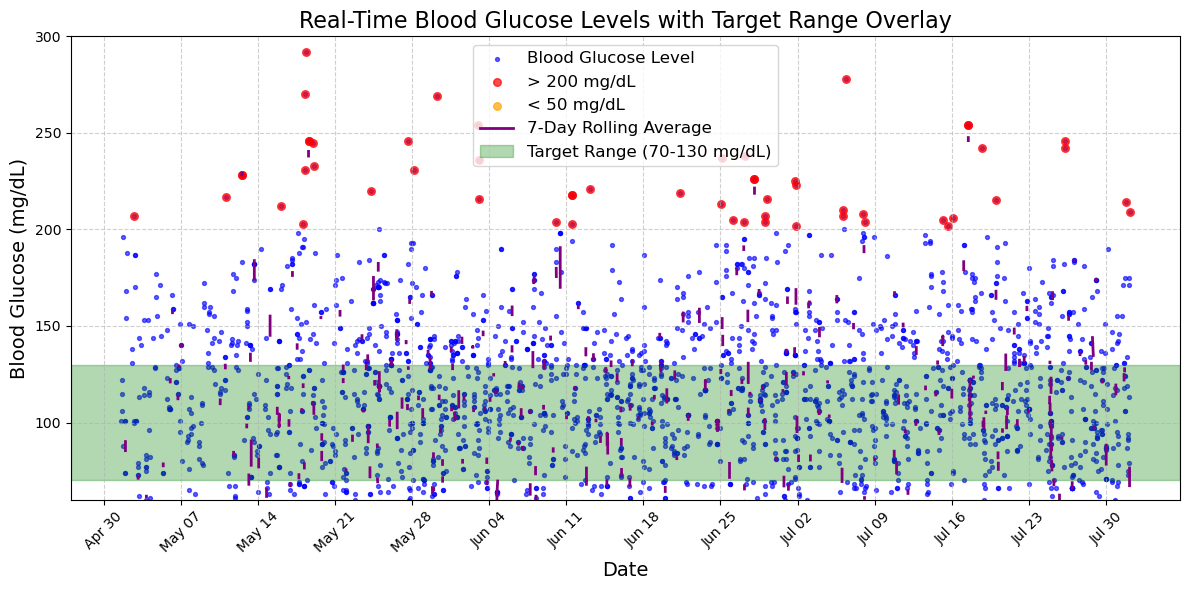

In [85]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Calculateing the rolling average to smooth the data over 7 days to help us see trends better by averaging nearby values
combined_df_cleaned['rolling_avg'] = combined_df_cleaned['bgl'].rolling(window=7, min_periods=1).mean()

# Setting up the size of the plot for better visibility
plt.figure(figsize=(12, 6))

# Plotting the actual blood glucose levels as blue dots ;'s=8' sets the size of the dots, and 'alpha=0.6' making them a bit transparent
plt.scatter(combined_df_cleaned['bgl_date'], combined_df_cleaned['bgl'], 
            label="Blood Glucose Level", color='b', s=8, alpha=0.6)

# Highlighting values above 200 mg/dL (in red) and below 50 mg/dL to spot very high or very low glucose levels
high_points = combined_df_cleaned[combined_df_cleaned['bgl'] > 200] 
low_points = combined_df_cleaned[combined_df_cleaned['bgl'] < 50]   

# Plotting the high values in red
plt.scatter(high_points['bgl_date'], high_points['bgl'], color='r', s=30, label='> 200 mg/dL', alpha=0.7)
# Plotting the low values in orange
plt.scatter(low_points['bgl_date'], low_points['bgl'], color='orange', s=30, label='< 50 mg/dL', alpha=0.7)

# Adding the rolling average as a smooth purple line to see the trend over time
plt.plot(combined_df_cleaned['bgl_date'], combined_df_cleaned['rolling_avg'], 
         color='purple', label='7-Day Rolling Average', linewidth=2)

# Adding a green shaded area for the target blood glucose range (70-130 mg/dL)
plt.axhspan(70, 130, color='green', alpha=0.3, label='Target Range (70-130 mg/dL)')

# Adding a grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Setting the title and labels for the x and y axes as Date and Blood Glucose Levels
plt.title("Real-Time Blood Glucose Levels with Target Range Overlay", fontsize=16)  
plt.xlabel("Date", fontsize=14) 
plt.ylabel("Blood Glucose (mg/dL)", fontsize=14)  

# Formatting the x-axis to display the date more clearly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))  # Show dates as month/day (e.g., May 07)
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))  # Add a tick for each week

# Setting limits for the y-axis to focus on the important range of blood glucose levels (60-300 mg/dL)
plt.ylim(60, 300)

plt.xticks(rotation=45)
plt.legend(fontsize=12)
plt.tight_layout() 
plt.show()  


This plot visualizes blood glucose levels over time, where each blue dot represents real-time blood glucose measurement taken at different points in time. There are numerous points above and below the target range. The multiple red dots, especially during certain periods, show episodes of hyperglycemia above 200mg/dL. A few orange dots indicate occasional hypoglycemia below 50 mg/dL. The purple line generally stays closer to the upper range of the target area, showing that the overall trend might indicate slightly elevated levels. The individual experiences a significant range of blood glucose readings, with frequent excursions outside the target range. With many readings above 130 mg/dL and red markers above 200mg/dL, the individual might be at risk of chronic hyperglycemia, which can lead to complications like nerve damage or cardiovascular disease if not controlled. The plot shows that maintaining glucose levels within the target range is a challenge. Improving dietary habits, medication adherence, or lifestyle changes may be necessary. While there are times when the levels fall within the target range(green shaded area), there are also clear periods of deviation, suggesting that better glucose management is required. By visualizing the deviations from the healthy range, the plot can prompt individuals to take proactive steps to avoid potential complications associated with uncontrolled blood sugar levels. In conclusion, this visualization serves as a crucial tool for monitoring blood glucose trends and provides actionable insights into better-managing diabetes or blood glucose-related health concerns.

## Scatter Plot with Time and Blood Glucose Level vs Insulin Intake

This is an effective way to visualize the correlation between blood glucose levels and insulin intake providing an intuitive way to represent two variables that interact over time. We can spot periods where higher insulin doses coincide with lower blood sugar levels or vice versa helping us understand the time-dependent response to insulin. Using a scatter plot, it is easy to compare whether morning or evening insulin doses are more effective in controlling blood sugar and it highlights variability where either insulin doses were inconsistent or the body's response to insulin fluctuated.

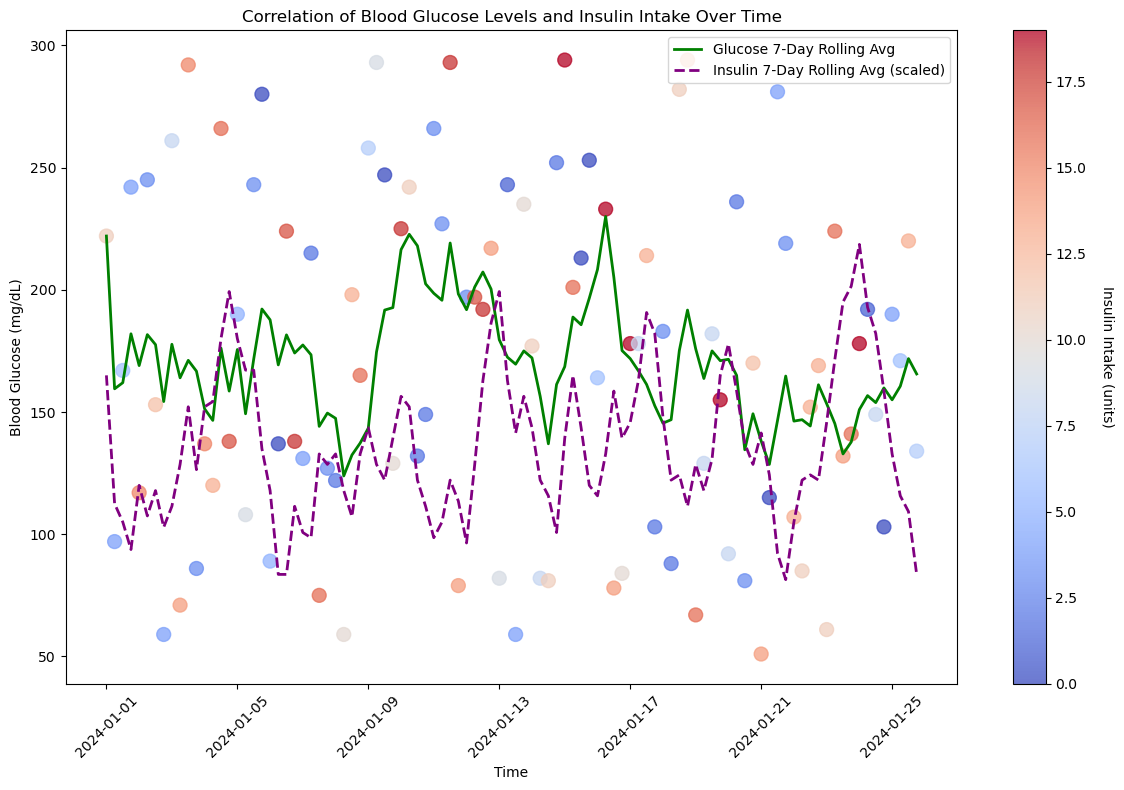

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simulating Data
np.random.seed(0)
time = pd.date_range('2024-01-01', periods=100, freq='6h')  # 100 data points with 6-hour intervals
blood_glucose = np.random.randint(50, 300, size=100)  # Random glucose levels between 50 and 300 mg/dL
insulin_intake = np.random.randint(0, 20, size=100)  # Random insulin intake between 0 and 20 units

# Creating a DataFrame
df = pd.DataFrame({'Time': time, 'Blood Glucose (mg/dL)': blood_glucose, 'Insulin Intake (units)': insulin_intake})

# Sorting values by time for better visualization
df = df.sort_values(by='Time')

# Calculating the rolling average for smoother trends (7-day window as an example)
df['Glucose Rolling Avg'] = df['Blood Glucose (mg/dL)'].rolling(window=7, min_periods=1).mean()
df['Insulin Rolling Avg'] = df['Insulin Intake (units)'].rolling(window=7, min_periods=1).mean()

plt.figure(figsize=(12, 8))

# Creating a scatter plot with color coding for insulin intake
scatter = plt.scatter(df['Time'], df['Blood Glucose (mg/dL)'], c=df['Insulin Intake (units)'], cmap='coolwarm', s=100, alpha=0.75)

# Adding the rolling average trend line for blood glucose levels
plt.plot(df['Time'], df['Glucose Rolling Avg'], color='green', label='Glucose 7-Day Rolling Avg', linewidth=2)

# Adding the rolling average trend line for insulin intake (optional to visualize this separately)
plt.plot(df['Time'], df['Insulin Rolling Avg'] * 15, color='purple', label='Insulin 7-Day Rolling Avg (scaled)', linestyle='--', linewidth=2)


plt.xticks(rotation=45)
plt.xlabel('Time')
plt.ylabel('Blood Glucose (mg/dL)')
plt.title('Correlation of Blood Glucose Levels and Insulin Intake Over Time')
cbar = plt.colorbar(scatter)
cbar.set_label('Insulin Intake (units)', rotation=270, labelpad=20)
plt.legend()
plt.tight_layout()
plt.show()

This green line represents the 7-day rolling average of blood glucose levels while the purple dashed line shows the scaled 7-day rolling average of insulin intake. The coloured dots, scaled according to insulin dosage, represent the actual daily insulin intake. From this plot, we can infer peaks in insulin, often correspond to dips in glucose levels, suggesting a responsive pattern. Conversely, instances where both glucose and insulin levels peak simultaneously may indicate periods of insulin resistance or poor glucose control. The use of rolling averages smooths daily fluctuations, helping identify long-term trends. By understanding these patterns, patients and healthcare providers can adjust insulin dosages more effectively, potentially improving blood sugar control.

Both the plots help to easily spot patterns and trends in blood sugar levels that might not be apparent from looking at raw numbers. The first plot shows when blood glucose levels are consistently outside the healthy range(both high and low), providing a clear guide to adjusting treatment plans. The second plot highlights whether insulin dosages are appropriately tuned to glucose levels over time, identifies periods of instability, and assists in personalizing treatment plans. Regular monitoring and adjusting insulin based on such trends can reduce risks of hypo- or hyperglycemia, improving overall patient outcomes.

### Ask a question(s) about the data and/or diabetes!
When creating the visualizations you probably had some questions about managing T1D. Ask some questions that might interest you and our diabetes experts will do their best to answer them for you! *Consider this an AMAA about diabetes.* 

1. Despite following recommended insulin regimens and dietary guidelines, many T1D patients still experience sudden spikes and drops in glucose levels. Could this be due to stress, illness, hormonal changes, or continuous glucose monitoring system inaccuracies? How can patients more effectively manage these fluctuations when standard practices don't provide stable control?

2. The relationship between insulin dosage, glucose levels, and external factors like exercise, emotional stress, or sickness can be complex and unpredictable. What strategies, beyond carbohydrate counting and insulin timing, can help patients anticipate and respond to these external influences in real time, especially when they lead to unexpected hyperglycemia or hypoglycemia?

### Final Task

Thanks for showing interest in our project! We plan to incorporate the best/most interesting visualizations into a substack post in the future. 

Please remember to create a pull request with your updated template, don't forget to rename the file to something that we can identify you with, e.g: `eda_[your_name].ipynb`